神经网络进行分类

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
# from sklearn.preprocessing import StandardScaler
# from matplotlib.colors import ListedColormap
np.random.seed(0)


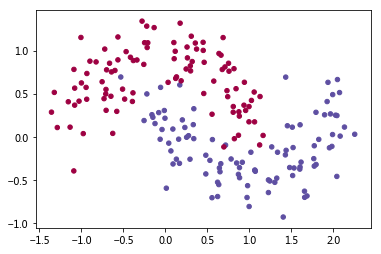

In [3]:
x,y = make_moons(n_samples=200,noise=0.2)
plt.scatter(x[:,0],x[:,1],s=20,c=y,cmap=plt.cm.Spectral)
plt.show()

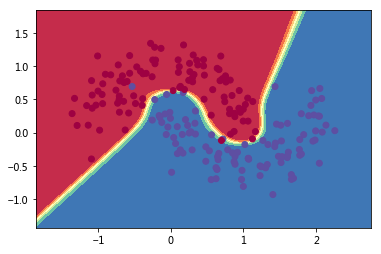

In [22]:
nn_input_dim = 2
nn_output_dim = 1
nn_hdim = 5
num_passes = 10000
epsilon = 0.01
# reg_lambda = 0.01
#激活函数sigmoid
def activation_layer(x,deriv=False):
    if deriv==True:
        return x*(1-x)
    return 1/(1+np.exp(-x))
#W，b初始化 正态分布
W1 = np.random.randn(nn_input_dim,nn_hdim ) / np.sqrt(nn_input_dim )
b1 = np.zeros((1,nn_hdim))
W2 = np.random.randn(nn_hdim,nn_output_dim ) / np.sqrt(nn_hdim)
b2 = np.zeros((1,nn_output_dim))
y = y.reshape(200,1)
for i in range(0,num_passes):
    Z1 = x.dot(W1)+b1
    A1 = activation_layer(Z1)
    Z2 = A1.dot(W2)+b2
    A2 = activation_layer(Z2)
    dZ2 = A2-y
    dW2 = (A1.T).dot(dZ2)
    db2 = np.sum(dZ2,axis = 0,keepdims=True)
    dZ1 = dZ2.dot(W2.T)*activation_layer(A1,True)
    dW1 = np.dot(x.T,dZ1)
    db1 = np.sum(dZ1,axis=0)
#     dW2 += reg_lambda*W2
#     dW1 += reg_lambda*W1
    W1 +=  -epsilon*dW1
    W2 +=  -epsilon*dW2
    b1 +=  -epsilon*db1
    b2 +=  -epsilon*db2
def pred_func(x):
    Z1 = x.dot(W1)+b1
    A1 = activation_layer(Z1)
    Z2 = A1.dot(W2)+b2
    A2 = activation_layer(Z2)
#     print(A2)
    return A2
x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Spectral)
plt.show()